## Import Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Merge 12 months of sales data into one file

In [2]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir("D:/Course Work/Pandas-Sales-Analysis/Sales_Data")]

for file in files:
    df=pd.read_csv("D:/Course Work/Pandas-Sales-Analysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("D:/Course Work/Pandas-Sales-Analysis/Sales_Data/all_data_copy.csv", index=False)
        

In [3]:
all_data = pd.read_csv("D:/Course Work/Pandas-Sales-Analysis/Sales_Data/all_data_copy.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean The Data

#### Remove NaN 

In [4]:

all_data = all_data.dropna(how='all')

#### Find 'Or' and delete it

In [5]:
#temp = all_data[all_data['Order Date'].str[0:2]=='Or']
#temp
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Add month column

In [6]:
all_data['Month'] = all_data["Order Date"].str[:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()
#Error 1: can't convert NaN to Int => Remove NaN
#Error 2: invalid literal for int(): 'Or' => Find 'Or' and delete it. For some reason, Order Date[:2] col had 'Or' instead of number

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add city column

In [7]:
#get city and state. because city names can be duplicates and refer to other countries ex: Portland, Oregon and Portland, England
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


## Data Exploration

#### Question 1: What was the best month for sales? How much was earned that month?

In [8]:
# Sales = Qunatity Ordered * Price Each
# First conver Qunatity Ordered and Price Each to numeric using pd.to_numeric()
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

# Add sales column 
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [10]:
results = all_data.groupby(['Month'])['Sales'].sum()
print (results)
##To sum up all numeric columns  use this instead
# numeric_columns = all_data.select_dtypes(include='number').columns
# all_data.groupby(['Month'])[numeric_columns].sum()

Month
1      5466770.19
2      6606067.26
3      8421301.14
4     10172010.72
5      9457820.25
6      7733406.78
7      7943327.28
8      6733403.64
9      6292680.39
10    11210180.64
11     9598809.60
12    13840330.02
Name: Sales, dtype: float64


#### Show sales sum in bar chart

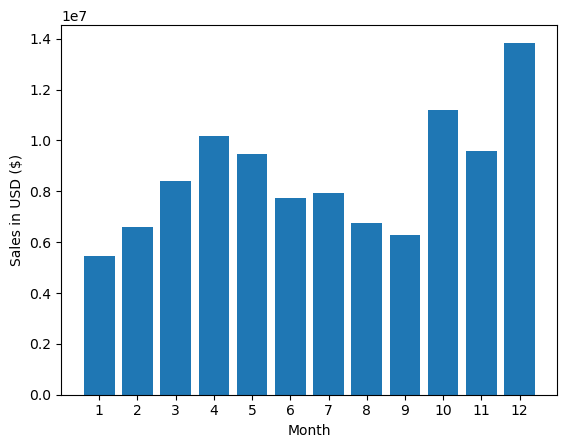

In [11]:
months = range(1,13)

plt.bar(months, results)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.show()

#### Question 2: What city sold the most product?

In [12]:
results = all_data.groupby(['City']).sum()
results

C:\Users\sarah\AppData\Local\Temp\ipykernel_24280\3824048795.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),49806,8339724.60,314382,8386495.74
Austin (TX),33459,5429620.83,209487,5458745.25
Boston (MA),67584,10912229.31,423336,10984926.03
Dallas (TX),50190,8257883.46,313860,8303926.20
Los Angeles (CA),99867,16264305.69,624975,16357712.40
New York City (NY),83796,13906112.49,527223,13992952.29
Portland (ME),8250,1341567.75,51432,1349274.81
Portland (OR),33909,5581674.66,211863,5612197.02
San Francisco (CA),150717,24634385.22,946560,24786611.73


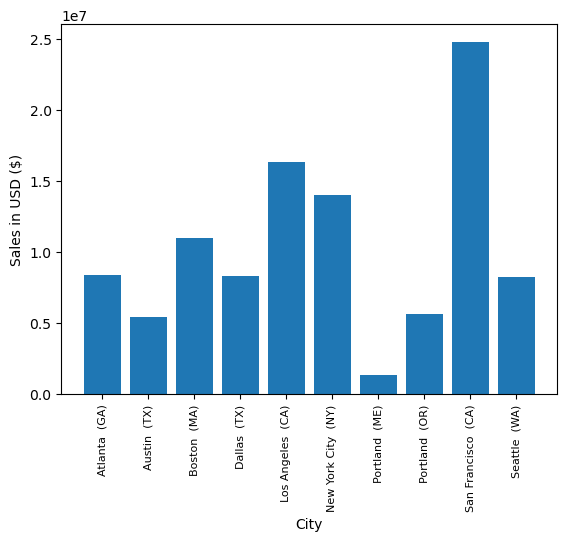

In [13]:
#We have two iteratables here becuase the groupby operation returns pairs of (group_name, group_data)
cities = [city for city,df in all_data.groupby('City')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation ='vertical', size =8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [14]:
#Convert date to date time object 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [30]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


In [15]:
#Adding hour column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9


In [46]:
hours =[hour for hour, df in all_data.groupby('Hour')]

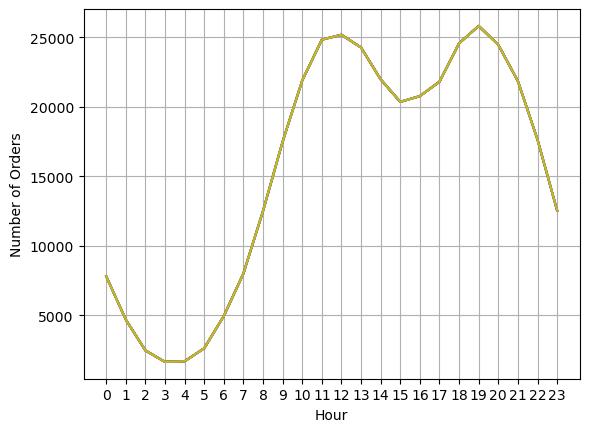

In [47]:
plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

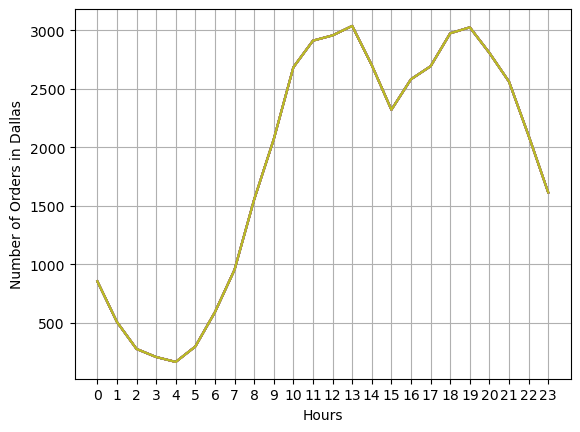

In [16]:
#Diplaying the number of orders per hour in Dallas city only 
Dallas_hours =[hour for hour, df in all_data[all_data['City'] =="Dallas  (TX)"].groupby('Hour')]

plt.plot(Dallas_hours, all_data[all_data['City'] =="Dallas  (TX)"].groupby('Hour').count())
plt.xticks(Dallas_hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders in Dallas')
plt.grid()
plt.show()

In [35]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

In [36]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('USB-C Charging Cable', 'USB-C Charging Cable') 66141
('Lightning Charging Cable', 'Lightning Charging Cable') 65460
('AAA Batteries (4-pack)', 'AAA Batteries (4-pack)') 62355
('AA Batteries (4-pack)', 'AA Batteries (4-pack)') 62046
('Wired Headphones', 'Wired Headphones') 56961
('Apple Airpods Headphones', 'Apple Airpods Headphones') 46863
('Bose SoundSport Headphones', 'Bose SoundSport Headphones') 40218
('27in FHD Monitor', '27in FHD Monitor') 22602
('iPhone', 'iPhone') 20544
('27in 4K Gaming Monitor', '27in 4K Gaming Monitor') 18735
